In [1]:
# !pip install bioinfokit
# !pip install umap-learn
# !pip install hdbscan

In [1]:
# Data Science Tools
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Bioinfotools
import bioinfokit as bik
from bioinfokit import analys, visuz
import TCRscape

# Dimension reduction and clustering libraries
from sklearn.decomposition import PCA
import umap.umap_ as umap
import hdbscan

pd.options.mode.chained_assignment = None

In [2]:
E6_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag07_hs_RSEC_MolsPerCell_MEX','E6')
E6_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag10_hs_RSEC_MolsPerCell_MEX','E6')

E7_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag01_hs_RSEC_MolsPerCell_MEX','E7')
E7_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag12_hs_RSEC_MolsPerCell_MEX','E7')

p53d_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag08_hs_RSEC_MolsPerCell_MEX','p53d')
p53d_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag09_hs_RSEC_MolsPerCell_MEX','p53d')
p53d_3 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag11_hs_RSEC_MolsPerCell_MEX','p53d')

In [3]:
merged = TCRscape.MergeRhapsody([E6_1,E6_2,E7_1,E7_2,p53d_1,p53d_2,p53d_3])
merged

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,S100A12,THBD,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,7,0,0,0,9,0,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,7,0,0,1,3,0,6,0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,1,0,0,0,0,0,10,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,7,0,0,3,6,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0,0,0,6,3,0,1,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,5,0,0,0,10,0,2,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56456846,2,0,0,0,2,0,8,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56523990,2,0,0,0,11,0,2,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
norm =  TCRscape.LogNormalize(merged)
norm

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
T = TCRscape.GateTcells(norm)
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
CD4 = TCRscape.GateCD4(T)
CD4

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
Cell_Index,,,,,,,,,,,,,,,,,,,,,
77731,0.000000,0.000000,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201392,3.044062,0.000000,0.0,0.000000,3.806591,0.0,3.945535,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
457038,4.835821,0.000000,0.0,0.000000,4.143064,0.0,4.810532,0.0,0.0,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468184,4.430356,5.348769,0.0,0.000000,5.332648,0.0,2.559240,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
534585,4.296825,0.000000,0.0,0.000000,5.030367,0.0,3.812003,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56048872,5.346647,5.348769,0.0,0.000000,3.583448,0.0,4.351000,0.0,0.0,4.498321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56231935,4.989972,0.000000,0.0,4.911288,5.492990,0.0,4.505150,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56244564,5.569790,0.000000,0.0,5.604435,4.143064,0.0,4.063318,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
CD8 = TCRscape.GateCD8(T)
CD8

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
AIRR = pd.read_csv("P53-HPV_Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)

AIRR['cell_id'] = AIRR['cell_id'].dropna()
AIRR['locus'] = AIRR['locus'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)
AIRR['cdr3_aa'] = AIRR['cdr3_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)

AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,25,T_CD8_memory,False,TRB,25_TRB_7,467,2,TTGTTTTGTTTTGTTTGTTAAGCTCTTTCCTGGACTCTTTCTACAG...,485,CFVLFVKLFPGLFLQHLFLSLTDSFHAKVTQTPGHLVKGKGQKTKM...,...,CTTCAAGAAACGGAGATGCACAAGAAGCGATTCTCATCTCAATGCC...,LQETEMHKKRFSSQCPKNAPCSLAILSSEPGDTALYLC,TTTGGTGATGGGACTCGACTCTCCATCCTA,W*WDSTLHP,AAAGGACATACTTTT,KGHTF,TTTCAGAATGAACAAGTT,FQNEQV,GCCAGCAGTCACCCGGTGGGGGCGAAATCAGCCCCAGCAT,ASSHPVGAKSAPA
1,1454,T_CD8_memory,True,TRB,1454_TRB_1,284,6,GGGATGCTTACTACAGAGACACCAGCCCCAAGCTAGGAGATCCTGC...,506,DAYYRDTSPKLGDPAMGFRLLCCVAFCLLGAGPVDSGVTQTPKHLI...,...,AGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCC...,RAKGNILERFSAQQFPDLHSELNLSSLELGDSALYFC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TCTGGAGACCTCTCT,SGDLS,TATTATAATGGAGAAGAG,YYNGEE,GCCAGCAGCGTAGCTTACAGGGGCCACGAGCAGTAC,ASSVAYRGHEQY
2,1613,T_CD8_memory,True,TRA,1613_TRA_1,4763,37,GGGGATCCACTGAGCCTCCTCCCTGCAGCTGGCTGATGTAGCTCAC...,738,GDPLSLLPAAG*CSSLVSV*IGSCDENKRSEHIQAP*EKAFL*PFL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGCCAAGGAACCAGGCTGACTATCAACCCA,FGQGTRLTINP,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGCTCAGGGAGCCCAGAAGCTGGTA,AAQGAQKLV
3,1613,T_CD8_memory,True,TRB,1613_TRB_1,5488,41,GTATGGGGGAAGCATTTGTGGAGACAATGATGTCACTGTAGGAACT...,607,YGGSICGDNDVTVGTSL*GQQHPTSSAPAHSDPDLAKLPSCPDPAM...,...,GTAGACGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGC...,VDDSQLPKDRFSAERLKGVDSTLKIQPAELGDSAVYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,TCTGGCCACAATACC,SGHNT,TATGAGAATGAGGAAGCA,YENEEA,GCCAGCAGCTTTAGTGTTAGGGACCAACGAGACTATGGCTACACC,ASSFSVRDQRDYGYT
4,2726,T_CD8_memory,True,TRA,2726_TRA_1,265,3,TGCATCCACCGAATTATTCGTTGTAGTTATGGGGGATCCAGACTGA...,609,CIHRIIRCSYGGSRLSFLPSPT*SVYLLQTPMAQELGMQCQARGIL...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTTGGAAAGGGCACAAGACTTTCTGTGATTGCA,FGKGTRLSVIA,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTGGGTATTCAGGAAACACACCTCTTGTC,AGYSGNTPLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67175,56617667,T_gamma_delta,True,TRG,56617667_TRG_1,2659,27,CTGCTGTGGGACTGCCCCCTCCTAGGGCTGGGCCTGCTGACTCCAG...,846,AVGLPPPRAGPADSRVCFPHLCTPSAAGLSSPCPWLSSAEGLLSAA...,...,GTGTTGGAATCAGGAGTCAGTCCAGGGAAGTATTATACTTACGCAA...,VLESGVSPGKYYTYASTRNNLRLILRNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GAAGGAAGTAACGGCTAC,EGSNGY,TATGACTCCTACAACTCCAAGGTT,YDSYNSKV,GCCACCTGGGACGGGCAAGGTTATAAGAAACTC,ATWDGQGYKKL
67176,56618448,T_CD8_memory,True,TRA,56618448_TRA_1,2074,24,GTATGGGGGATTCTTACCAAAACAAGAGACTTGCCTAGCCCAACCT...,637,YGGFLPKQETCLAQPSSRSLFSRPGFQPLSYWPRGEFPKRRLQCFH...,...,AAAGGCATCAAGGGCTTTGAGGCTGAATTTATAAAGAGTAAATTCT...,KGIKGFEAEFIKSKFSFNLRKPSVQWSDTAEYFC,TTTGGAAGAGGAACTCAGTTGACTGTCTGGCCT,FGRGTQLTVWP,TATGGTGGAACTGTTAAT,YGGTVN,TACTTTTCAGGGGATCCACTGGTT,YFSGDPLV,GCCGTGATTCCCCCAGGCTCAACCCTGGGGAGGCTATAC,AVIPPGSTLGRLY
67177,56618448,T_CD8_memory,True,TRB,56618448_TRB_2,18130,91,TATGGGGGCTGTCCTGTCTCCTCATCTGCAAAATTAGGAAGCCTGT...,649,MGAVLSPHLQN*EACLDYLQEPPTSSFQPLTNSAH*ARRSPRAKSL...,...,TTTCAGAAAGGAGATATAGCTGAAGGGTACAGCGTCTCTCGGGAGA...,FQKGDIAEGYSVSREKKESFPLTVTSAQKNPTAFYLC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TTGAACCACGATGCC,LNHDA,TCACAGATAGTAAATGAC,SQIVND,GCCAGTAATTCCGTATGGGGAGGCGAGCAGTAC,ASNSVWGGEQY
67178,56619358,T_CD8_memory,True,TRA,56619358_TRA_1,322,9,GGGAGTGATGCCCTCTGCTAGGCCAGAGACACTAACAATGAACTCC...,490,GVMPSARPETLTMNSSLDFLILILMFGGTSSNSVKQTGQITVSEGA...,...,AACAGCAAAAACTTCGGAGGCGGAAATATTAAAGACAAAAACTCCC...,NSKNFGGGNIKDKNSPIVKYSVQVSDSAVYYC,TTTGGCGCAGGAACCATTCTGAGAGTCAAGTCC,FGAGTILRVKS,TCCACGGGGTACCCTACC,STGYPT,GAGACAATGGAA,ETME,CTTCTGGAATATGGAAACAAGCTGGTC,LLEYGNKLV


In [9]:
e6 = CD8[CD8['Sample_E6'] == 1]
e7 = CD8[CD8['Sample_E7'] == 1]
p53d = CD8[CD8['Sample_p53d'] == 1]

In [139]:
e6

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
0,0,50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,8240,56608620,0.000000,0.0,0.0,0.000000,0.000000,0.0,3.475531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8241,8241,56614258,2.350914,0.0,0.0,0.000000,2.890301,0.0,3.475531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8242,8242,56614276,3.737209,0.0,0.0,5.604435,3.583448,0.0,4.168678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8243,8243,56615650,0.000000,0.0,0.0,0.000000,2.890301,0.0,1.866093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


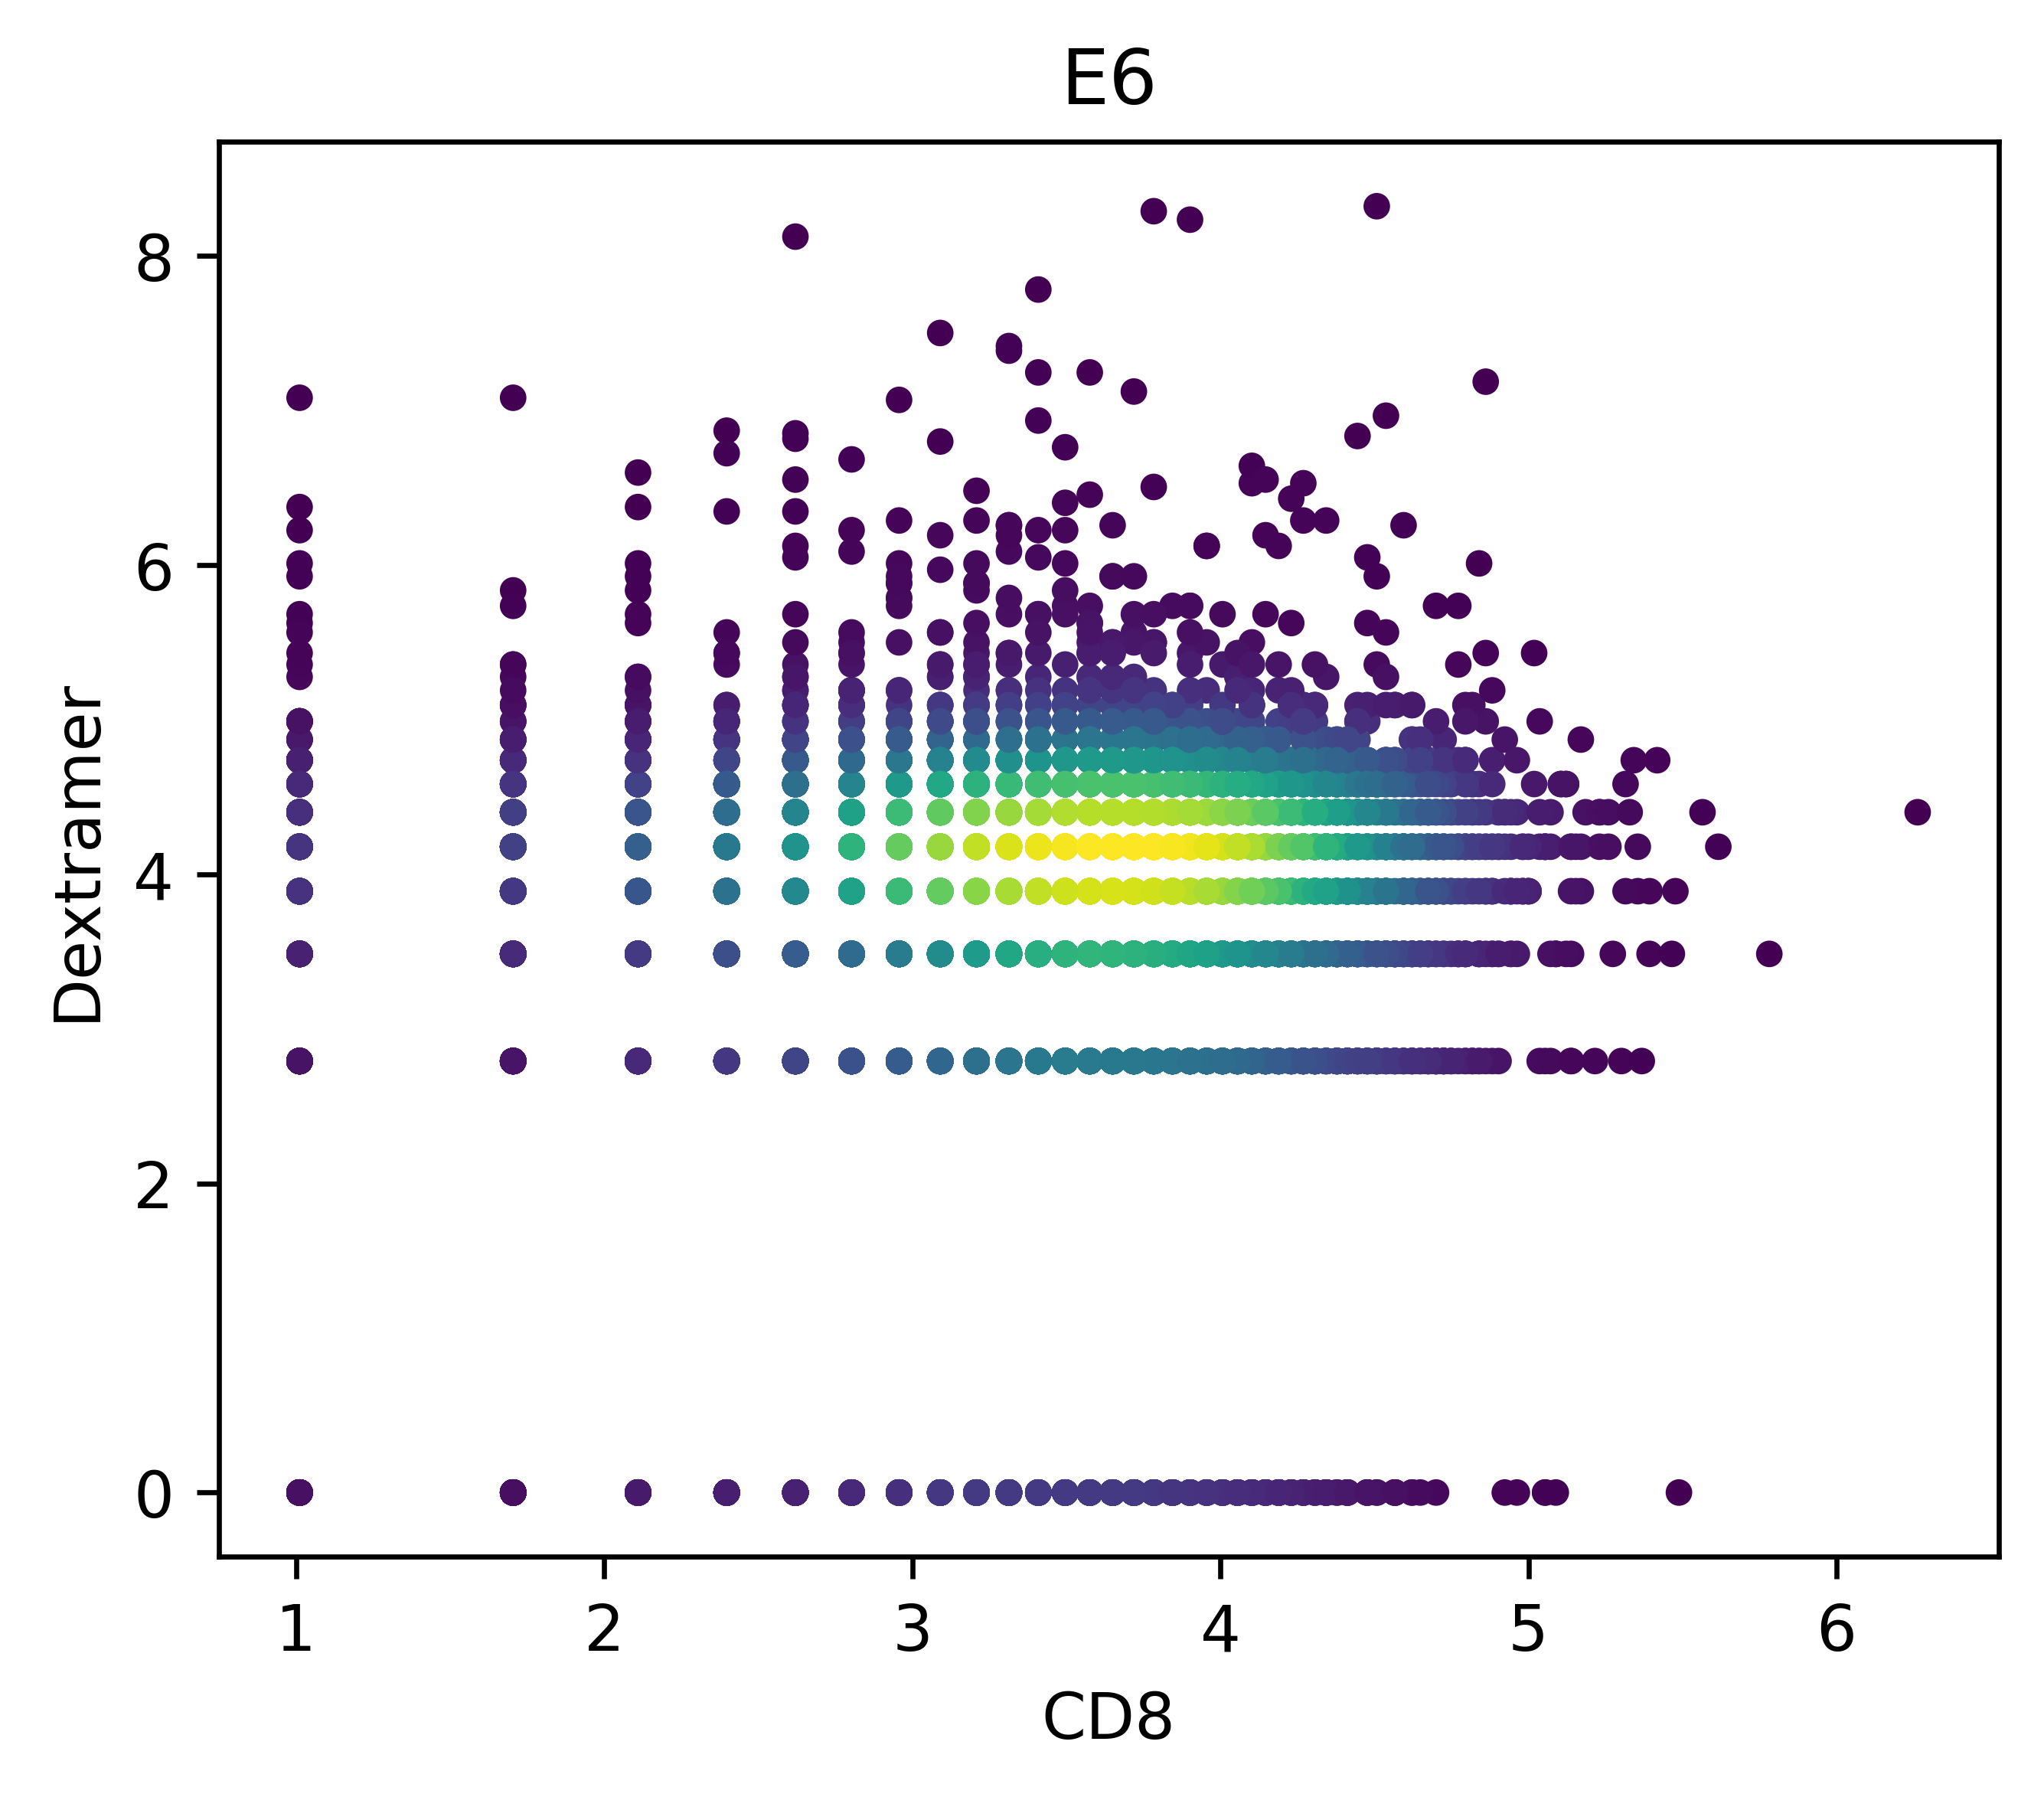

In [140]:
from scipy.stats import gaussian_kde

# Markers
x = e6["CD8A"]
y = e6["Dextramer_HPV_16_E6|pAbO"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(5,4),dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("E6")
plt.xlabel('CD8')
plt.ylabel('Dextramer')
plt.show()

In [141]:
# Gate cell population
gated = e6

gated = gated[gated['Dextramer_HPV_16_E6|pAbO'] > 2]
gated = gated[gated['CD8A'] > 0]

gated

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
0,0,50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,8239,56605357,3.044062,0.0,0.0,0.000000,0.000000,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8240,8240,56608620,0.000000,0.0,0.0,0.000000,0.000000,0.0,3.475531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8241,8241,56614258,2.350914,0.0,0.0,0.000000,2.890301,0.0,3.475531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8243,8243,56615650,0.000000,0.0,0.0,0.000000,2.890301,0.0,1.866093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0, 0.5, 'CD8')

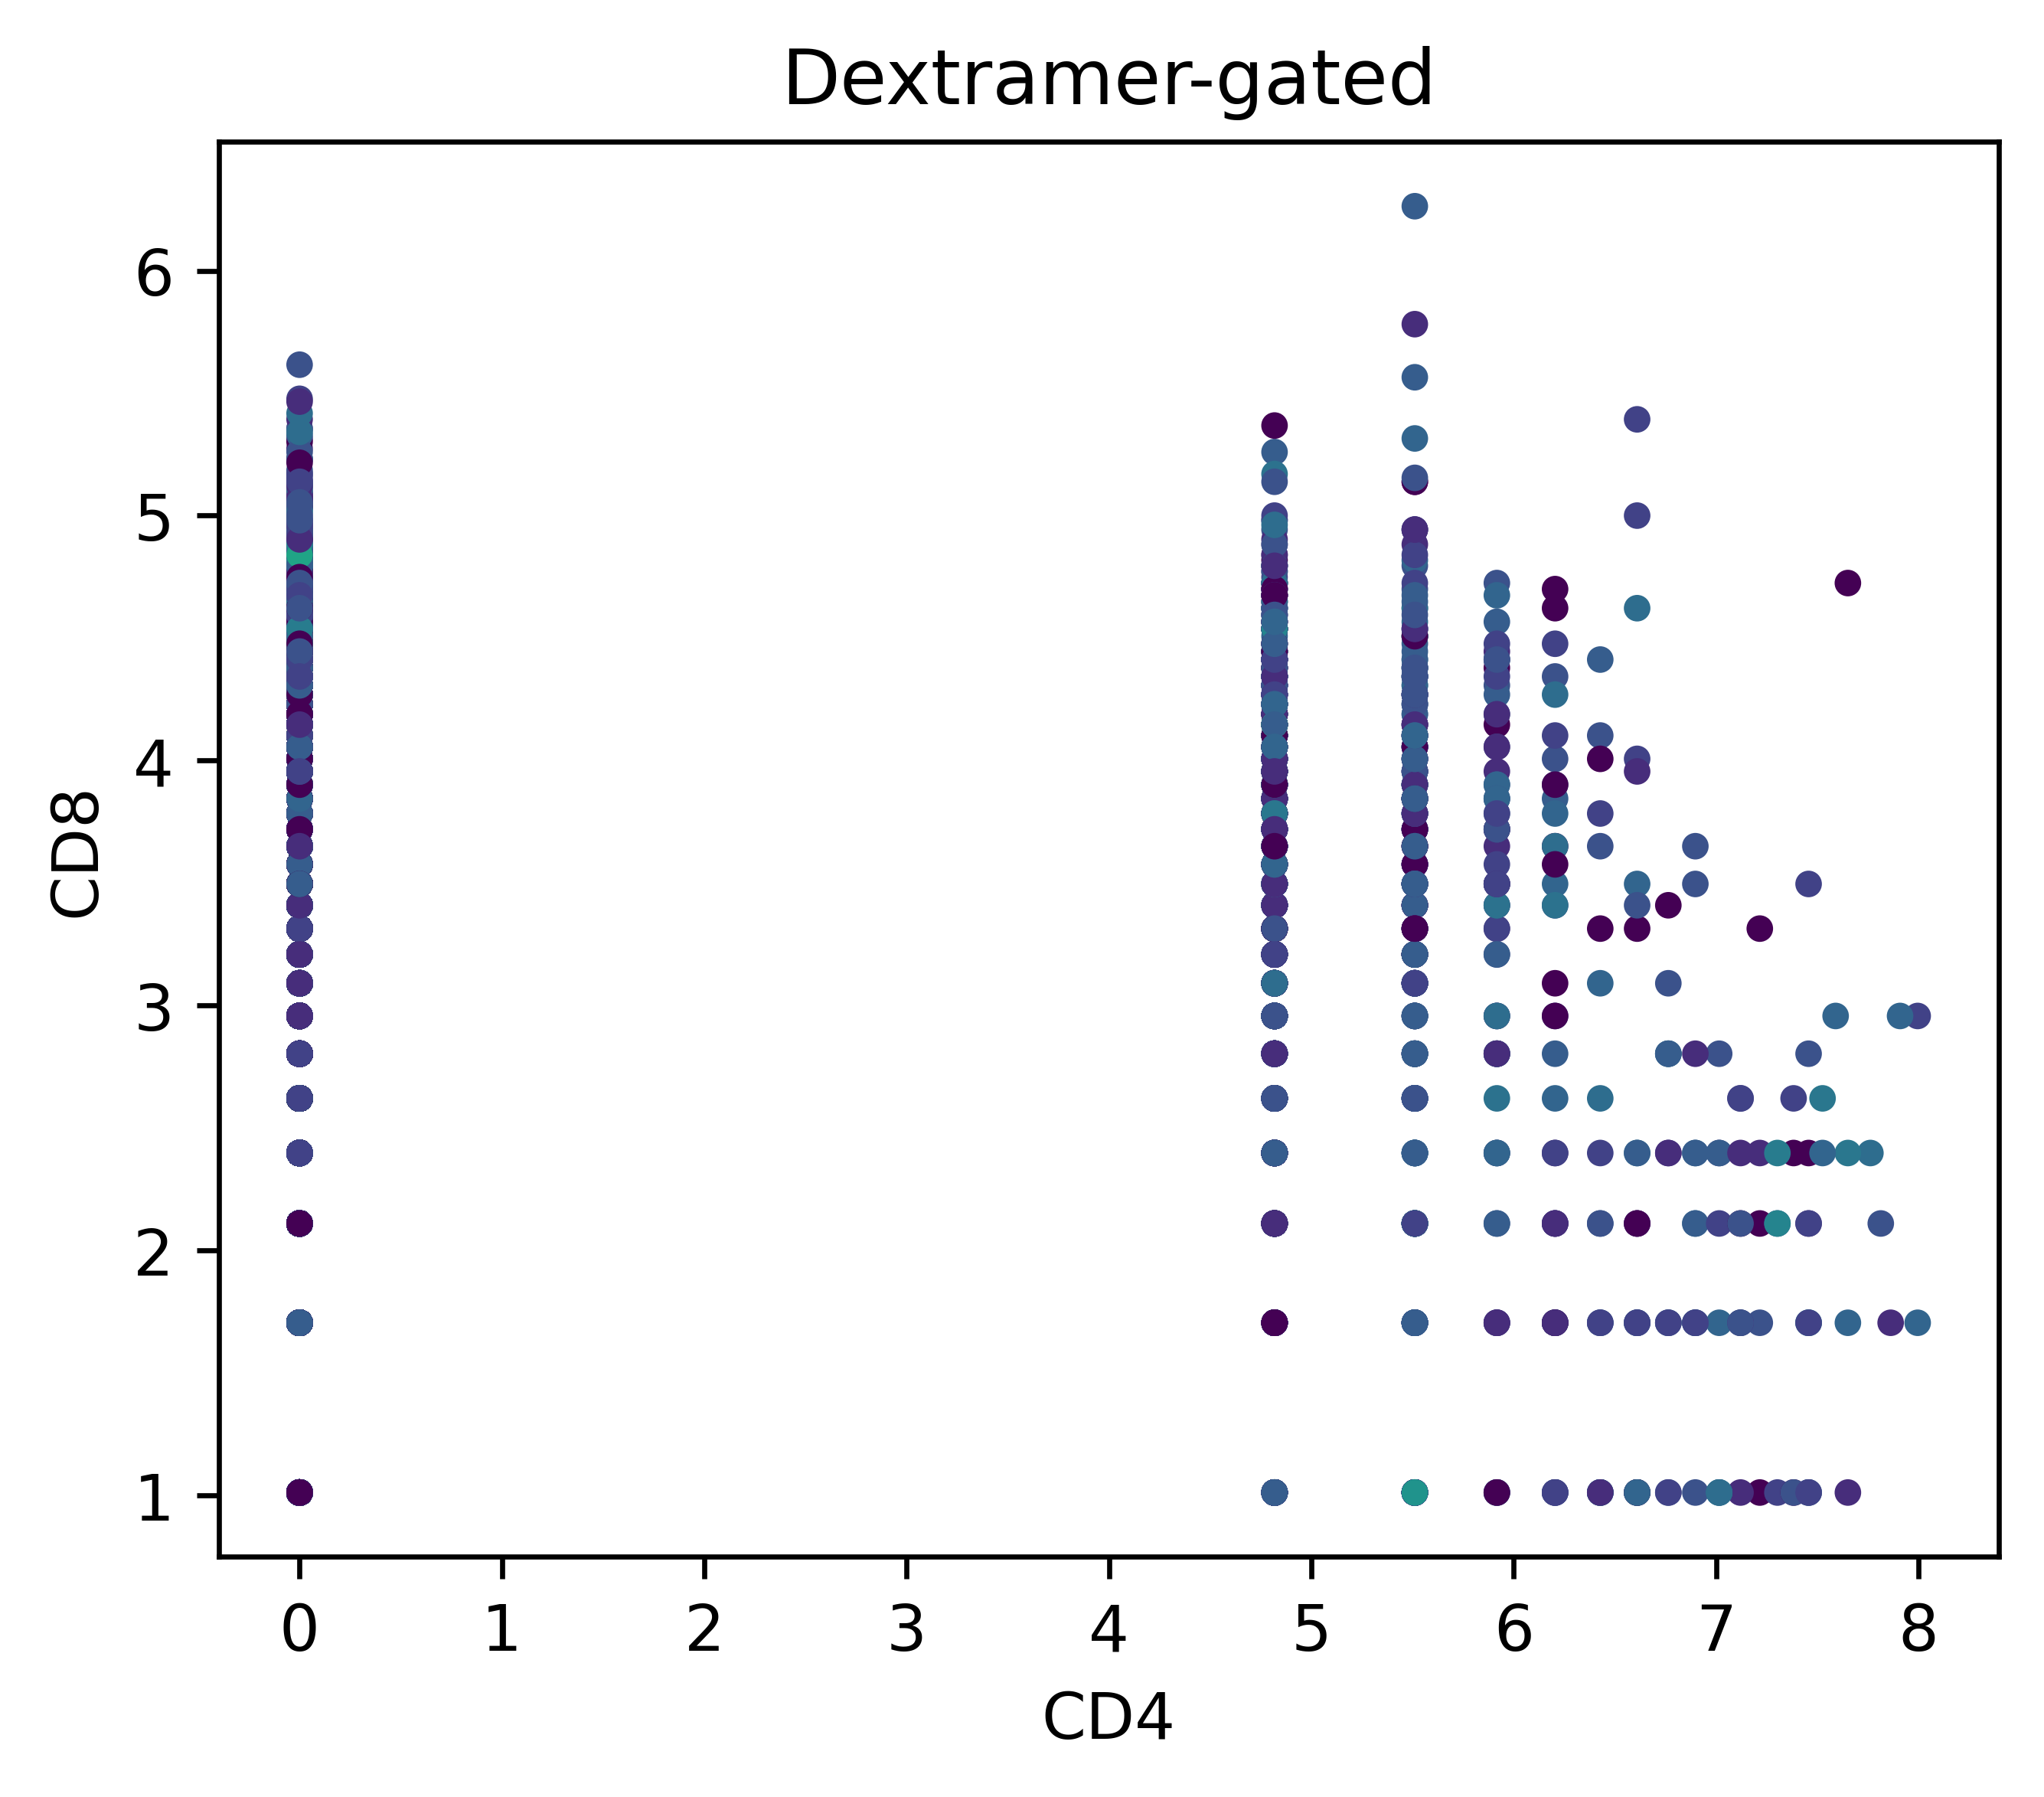

In [142]:
x = gated["CD4"]
y = gated["CD8A"]
z = gated["Dextramer_HPV_16_E6|pAbO"]

fig, ax = plt.subplots(figsize=(5,4), dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("Dextramer-gated")
plt.xlabel('CD4')
plt.ylabel('CD8')

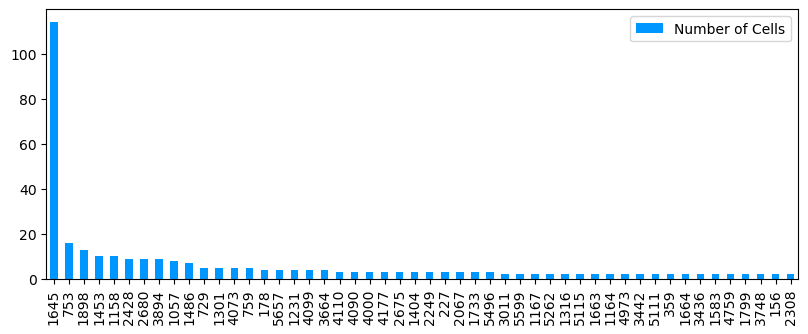

In [143]:
Counts = TCRscape.CountCDR3(gated, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts E6.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts E6.csv')
plt.show()

In [144]:
e7

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
0,0,1454,0.000000,0.0,0.0,6.009900,4.143064,0.0,3.812003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,3866,2.350914,0.0,0.0,4.911288,2.890301,0.0,2.964705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,7880,2.350914,0.0,0.0,0.000000,2.197154,0.0,3.812003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,23743,3.044062,0.0,0.0,0.000000,3.988913,0.0,4.574143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,39654,3.044062,0.0,0.0,0.000000,2.197154,0.0,4.263988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,7261,56590952,3.960352,0.0,0.0,0.000000,3.295766,0.0,3.812003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7262,7262,56593937,3.449527,0.0,0.0,0.000000,4.394378,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7263,7263,56598104,3.960352,0.0,0.0,0.000000,0.000000,0.0,2.964705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7264,7264,56604217,2.350914,0.0,0.0,0.000000,3.583448,0.0,3.252387,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


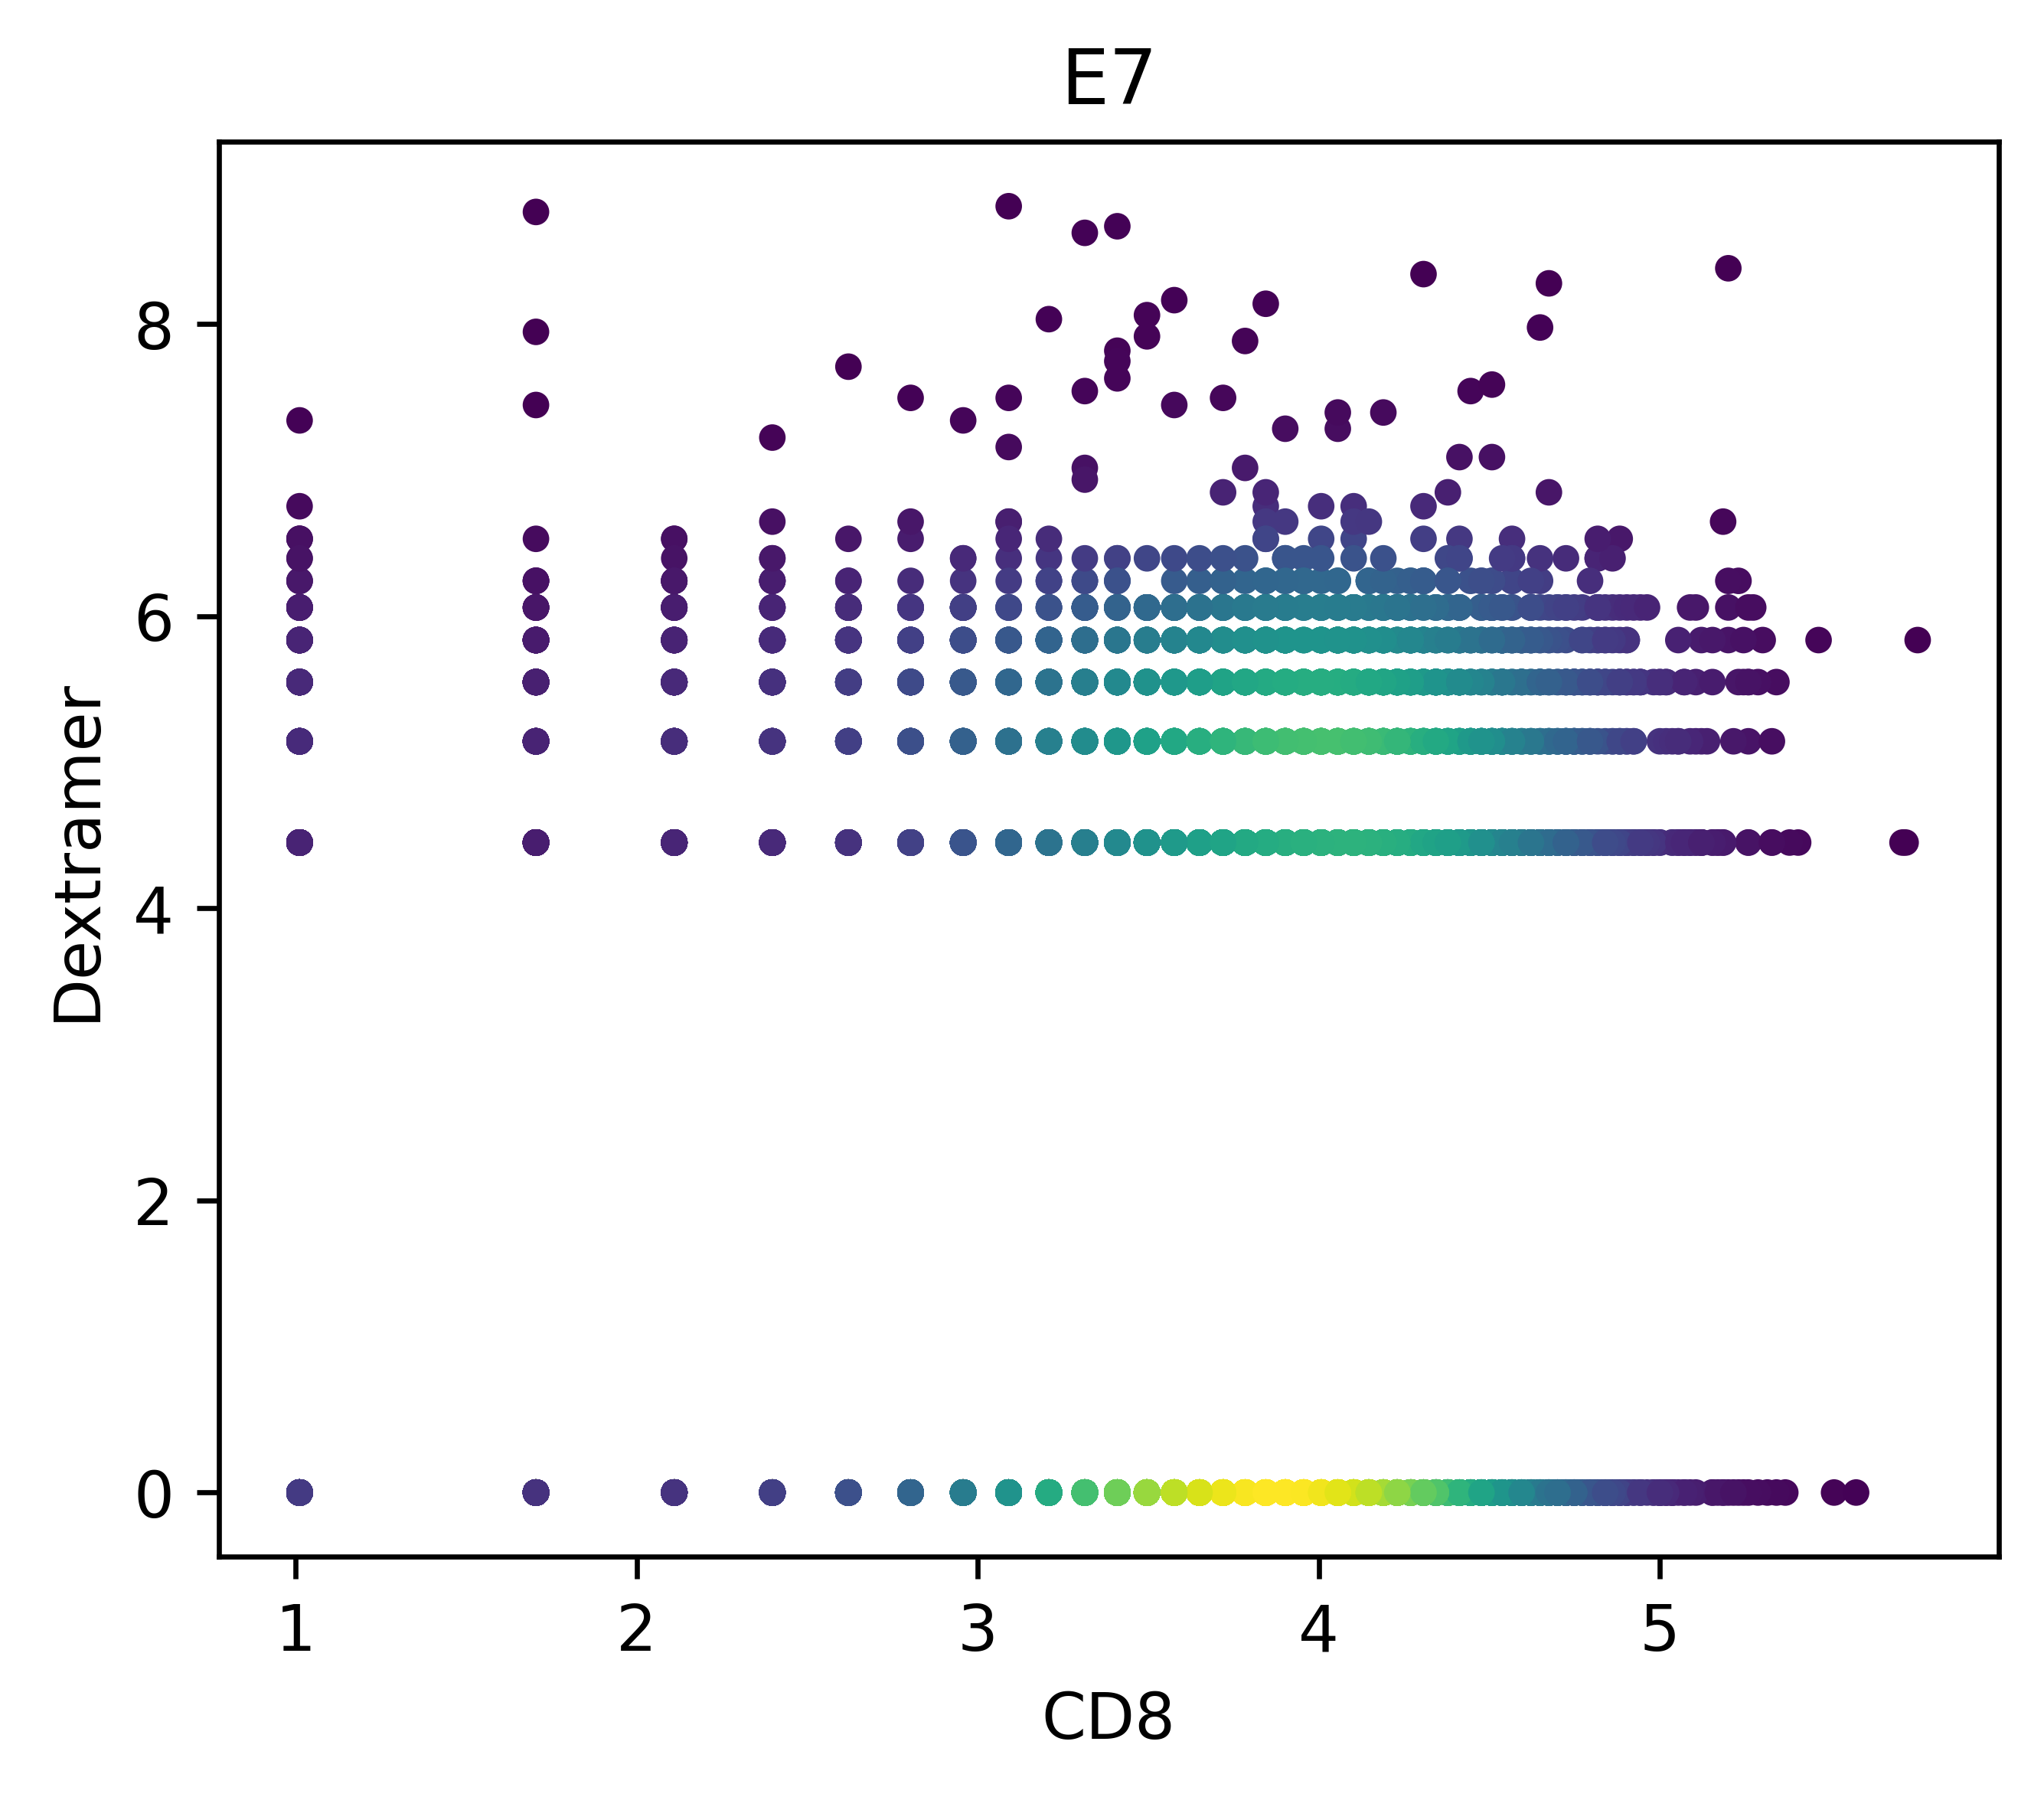

In [145]:
from scipy.stats import gaussian_kde

# Markers
x = e7["CD8A"]
y = e7["Dextramer_HPV_16_Е7|pAbO"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(5,4),dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("E7")
plt.xlabel('CD8')
plt.ylabel('Dextramer')
plt.show()

In [146]:
# Gate cell population
gated = e7

gated = gated[gated['Dextramer_HPV_16_Е7|pAbO'] > 2.5]
gated = gated[gated['CD8A'] > 0]

gated

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
1,1,3866,2.350914,0.000000,0.0,4.911288,2.890301,0.0,2.964705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,7880,2.350914,0.000000,0.0,0.000000,2.197154,0.0,3.812003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,23743,3.044062,0.000000,0.0,0.000000,3.988913,0.0,4.574143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,39654,3.044062,0.000000,0.0,0.000000,2.197154,0.0,4.263988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,83125,3.044062,6.447381,0.0,0.000000,4.499739,0.0,5.233389,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,7259,56538231,2.350914,0.000000,0.0,0.000000,2.890301,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7260,7260,56539031,3.737209,0.000000,0.0,0.000000,2.890301,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7261,7261,56590952,3.960352,0.000000,0.0,0.000000,3.295766,0.0,3.812003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7262,7262,56593937,3.449527,0.000000,0.0,0.000000,4.394378,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0, 0.5, 'CD8')

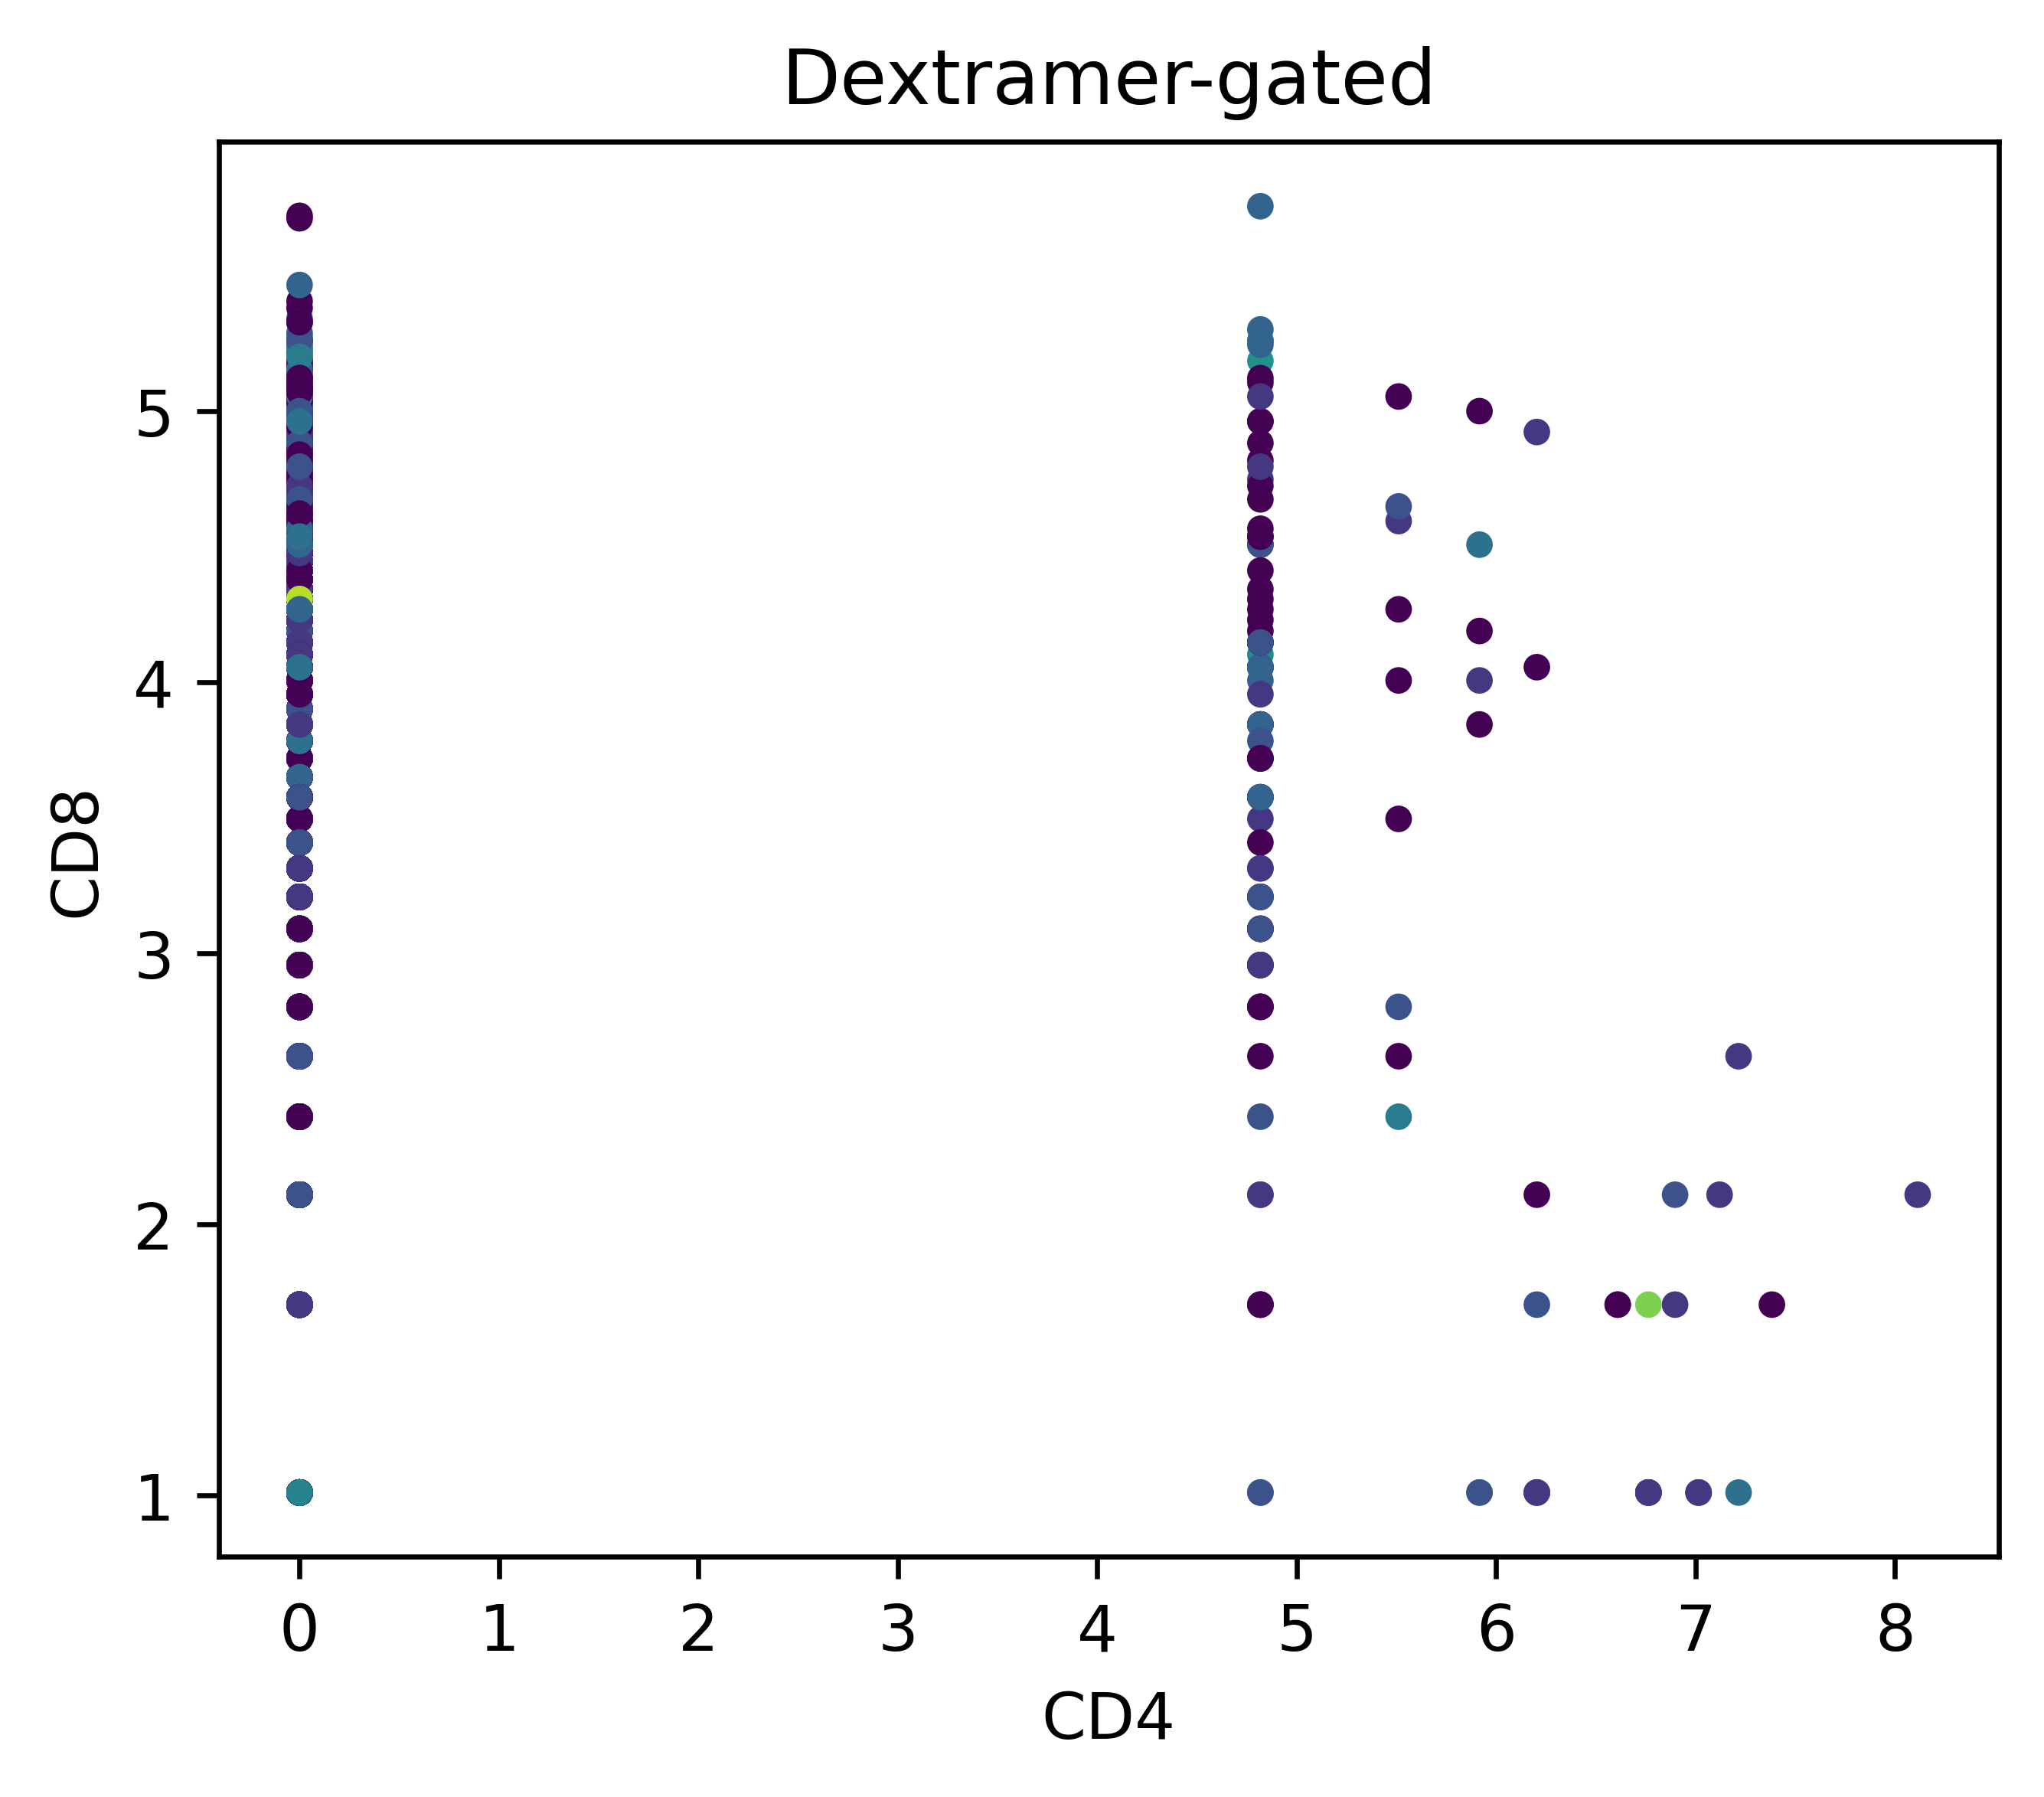

In [147]:
x = gated["CD4"]
y = gated["CD8A"]
z = gated["Dextramer_HPV_16_Е7|pAbO"]

fig, ax = plt.subplots(figsize=(5,4), dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("Dextramer-gated")
plt.xlabel('CD4')
plt.ylabel('CD8')

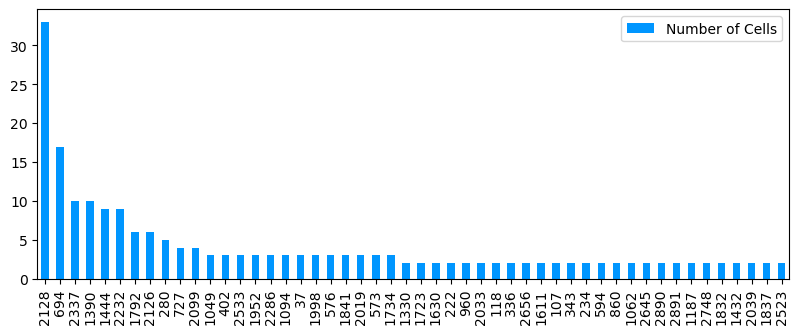

In [148]:
Counts = TCRscape.CountCDR3(gated, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts E7.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts E7.csv')
plt.show()

In [149]:
p53d

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
0,0,13140,4.548139,0.000000,0.0,0.0,3.295766,0.0,4.263988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,35125,2.350914,0.000000,0.0,0.0,5.087525,0.0,4.351000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,62591,2.350914,0.000000,0.0,0.0,2.890301,0.0,4.063318,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,196686,2.350914,5.348769,0.0,0.0,2.890301,0.0,3.657852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,207504,3.044062,0.000000,0.0,0.0,2.197154,0.0,4.351000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,6950,56439707,3.960352,0.000000,0.0,0.0,4.499739,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6951,6951,56456846,3.044062,0.000000,0.0,0.0,2.890301,0.0,3.945535,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6952,6952,56523990,3.044062,0.000000,0.0,0.0,4.595049,0.0,2.559240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6953,6953,56552780,2.350914,0.000000,0.0,0.0,2.197154,0.0,2.964705,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


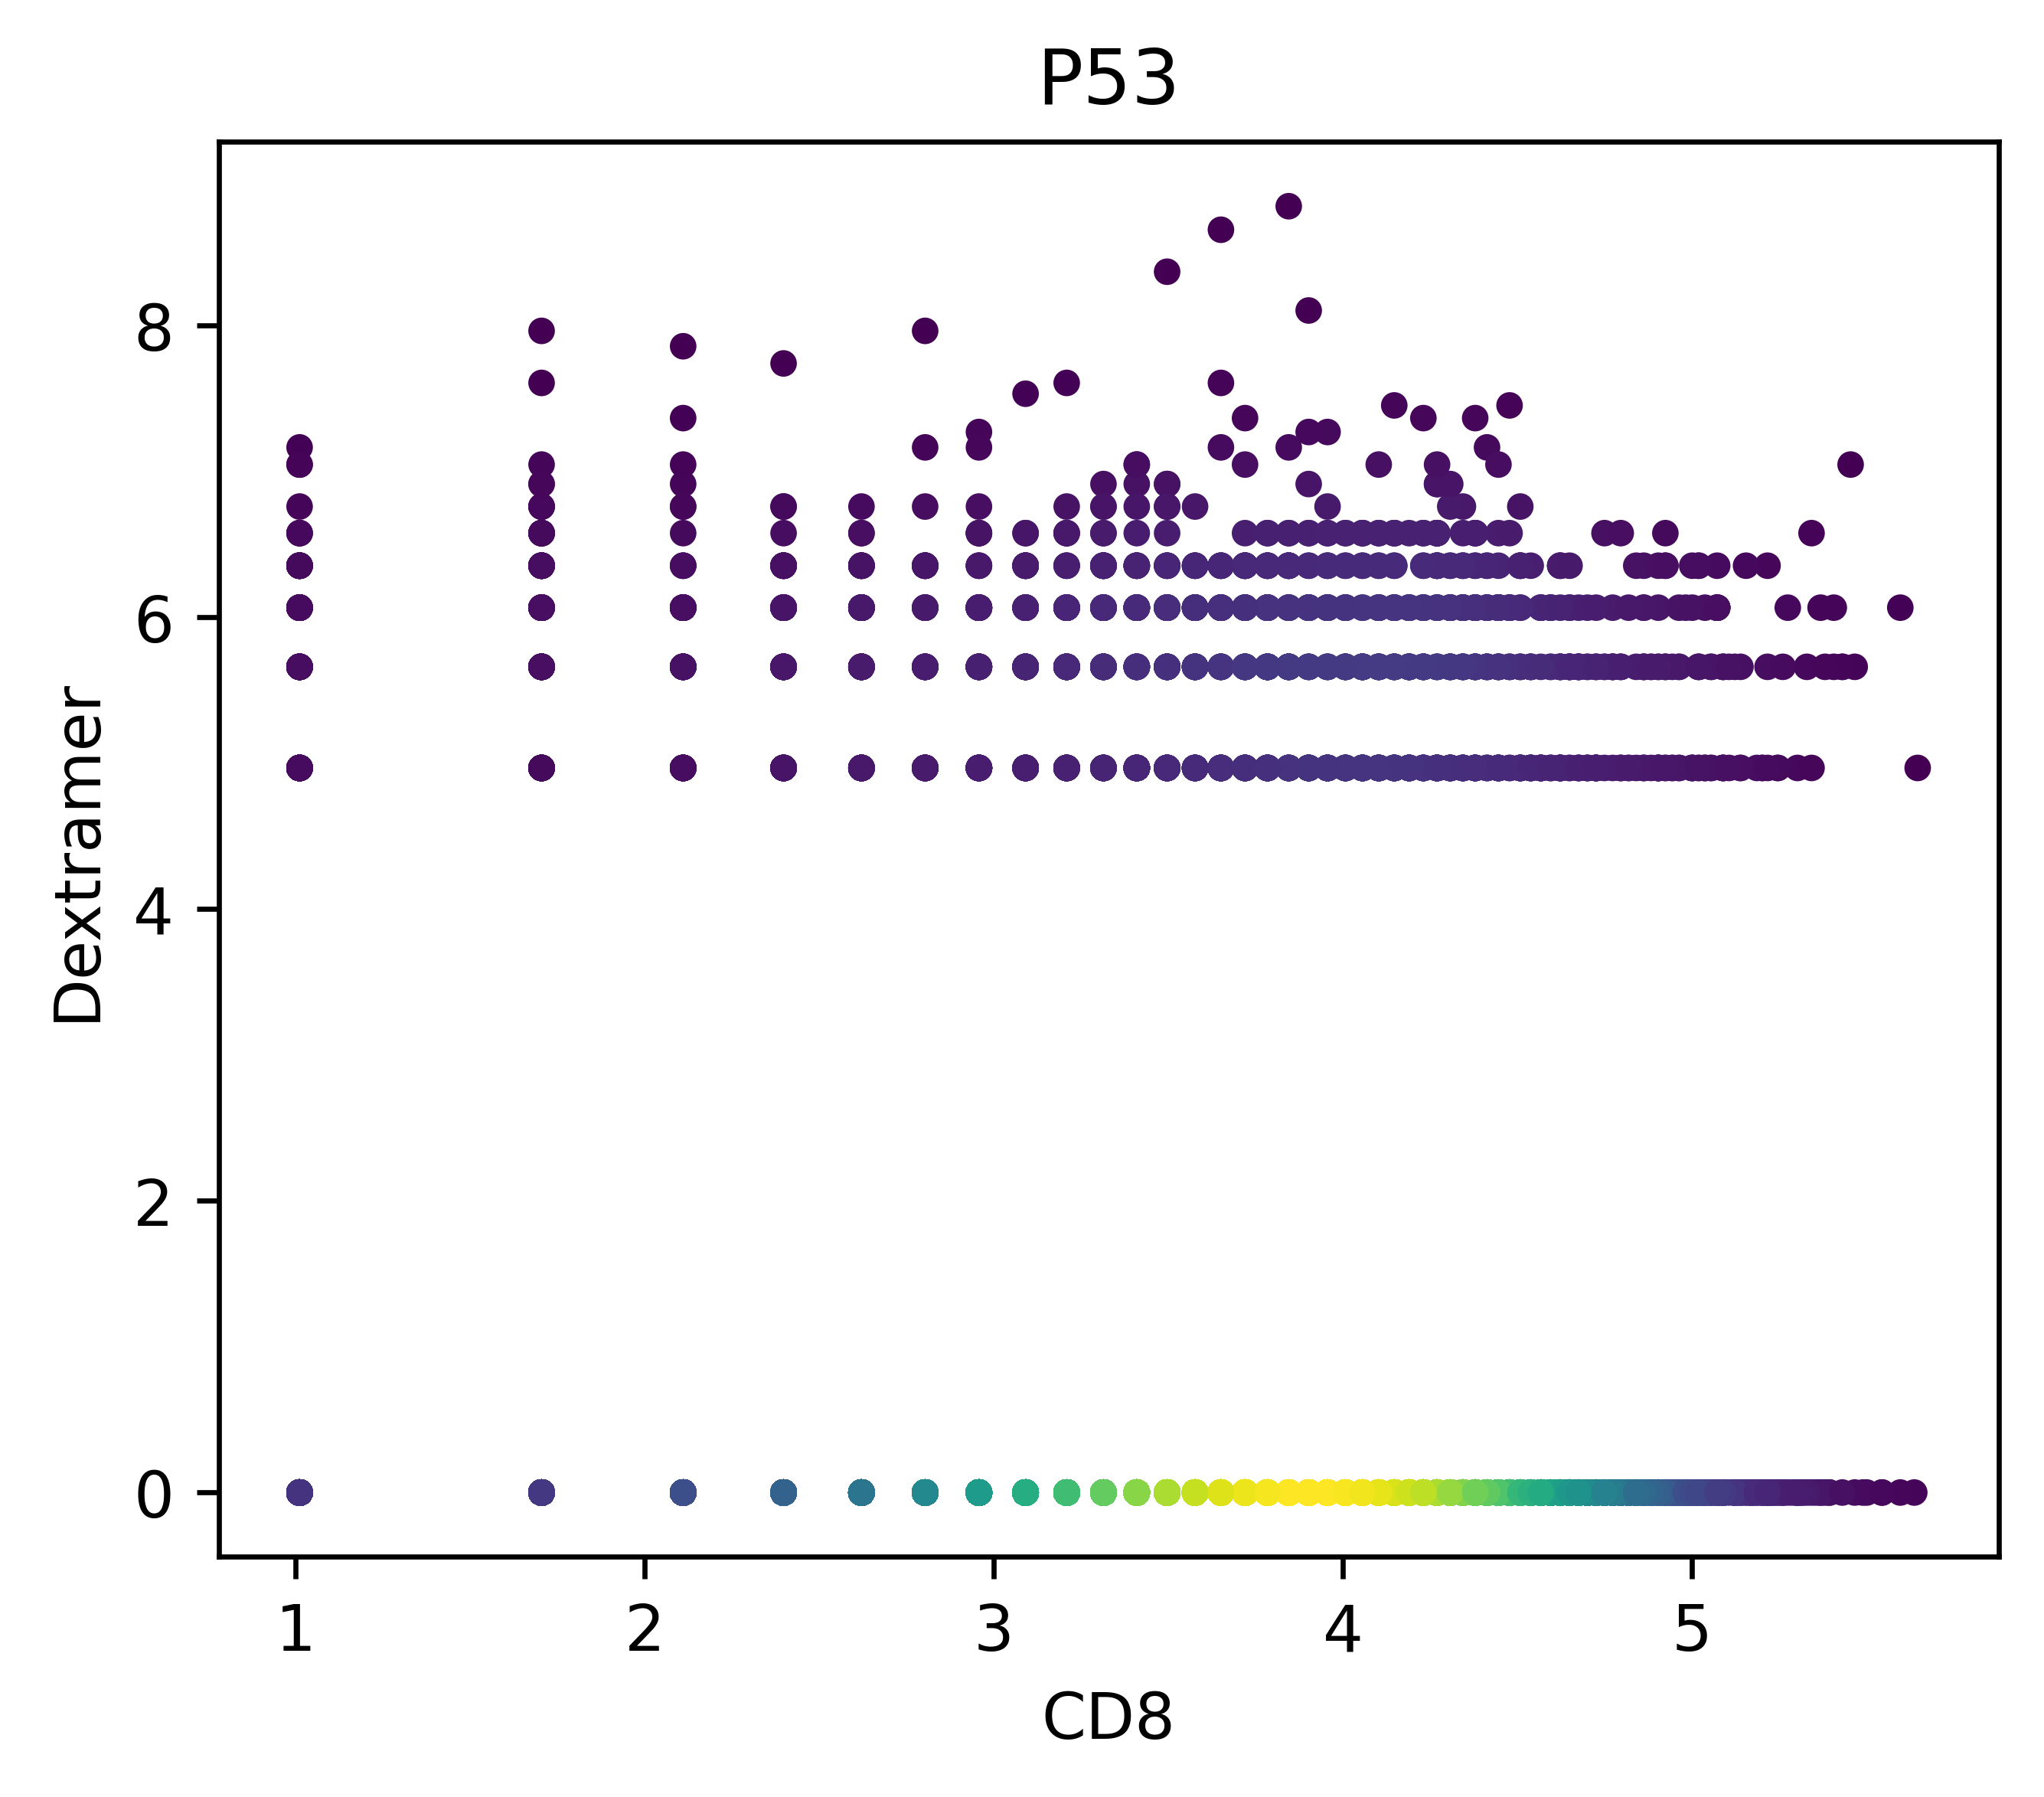

In [150]:
from scipy.stats import gaussian_kde

# Markers
x = p53d["CD8A"]
y = p53d["Dextramer_p53_Y220C|pAbO"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(5,4),dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("P53")
plt.xlabel('CD8')
plt.ylabel('Dextramer')
plt.show()

In [151]:
# Gate cell population
gated = p53d

gated = gated[gated['Dextramer_p53_Y220C|pAbO'] > 2.5]
gated = gated[gated['CD8A'] > 0]

gated

,index,Cell_Index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
3,3,196686,2.350914,5.348769,0.0,0.000000,2.890301,0.0,3.657852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5,227370,4.430356,0.000000,0.0,0.000000,2.890301,0.0,4.063318,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,7,285439,4.142674,0.000000,0.0,6.009900,4.595049,0.0,4.699306,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,12,700741,3.737209,0.000000,0.0,0.000000,3.295766,0.0,3.945535,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,14,725485,3.449527,5.348769,0.0,0.000000,3.295766,0.0,4.168678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6931,56114729,4.142674,0.000000,0.0,6.009900,4.499739,0.0,4.168678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6937,6937,56206404,3.449527,0.000000,0.0,0.000000,3.988913,0.0,3.657852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6943,6943,56307662,2.350914,0.000000,0.0,0.000000,2.890301,0.0,1.866093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6946,6946,56318350,4.835821,0.000000,0.0,4.911288,4.143064,0.0,5.124190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0, 0.5, 'CD8')

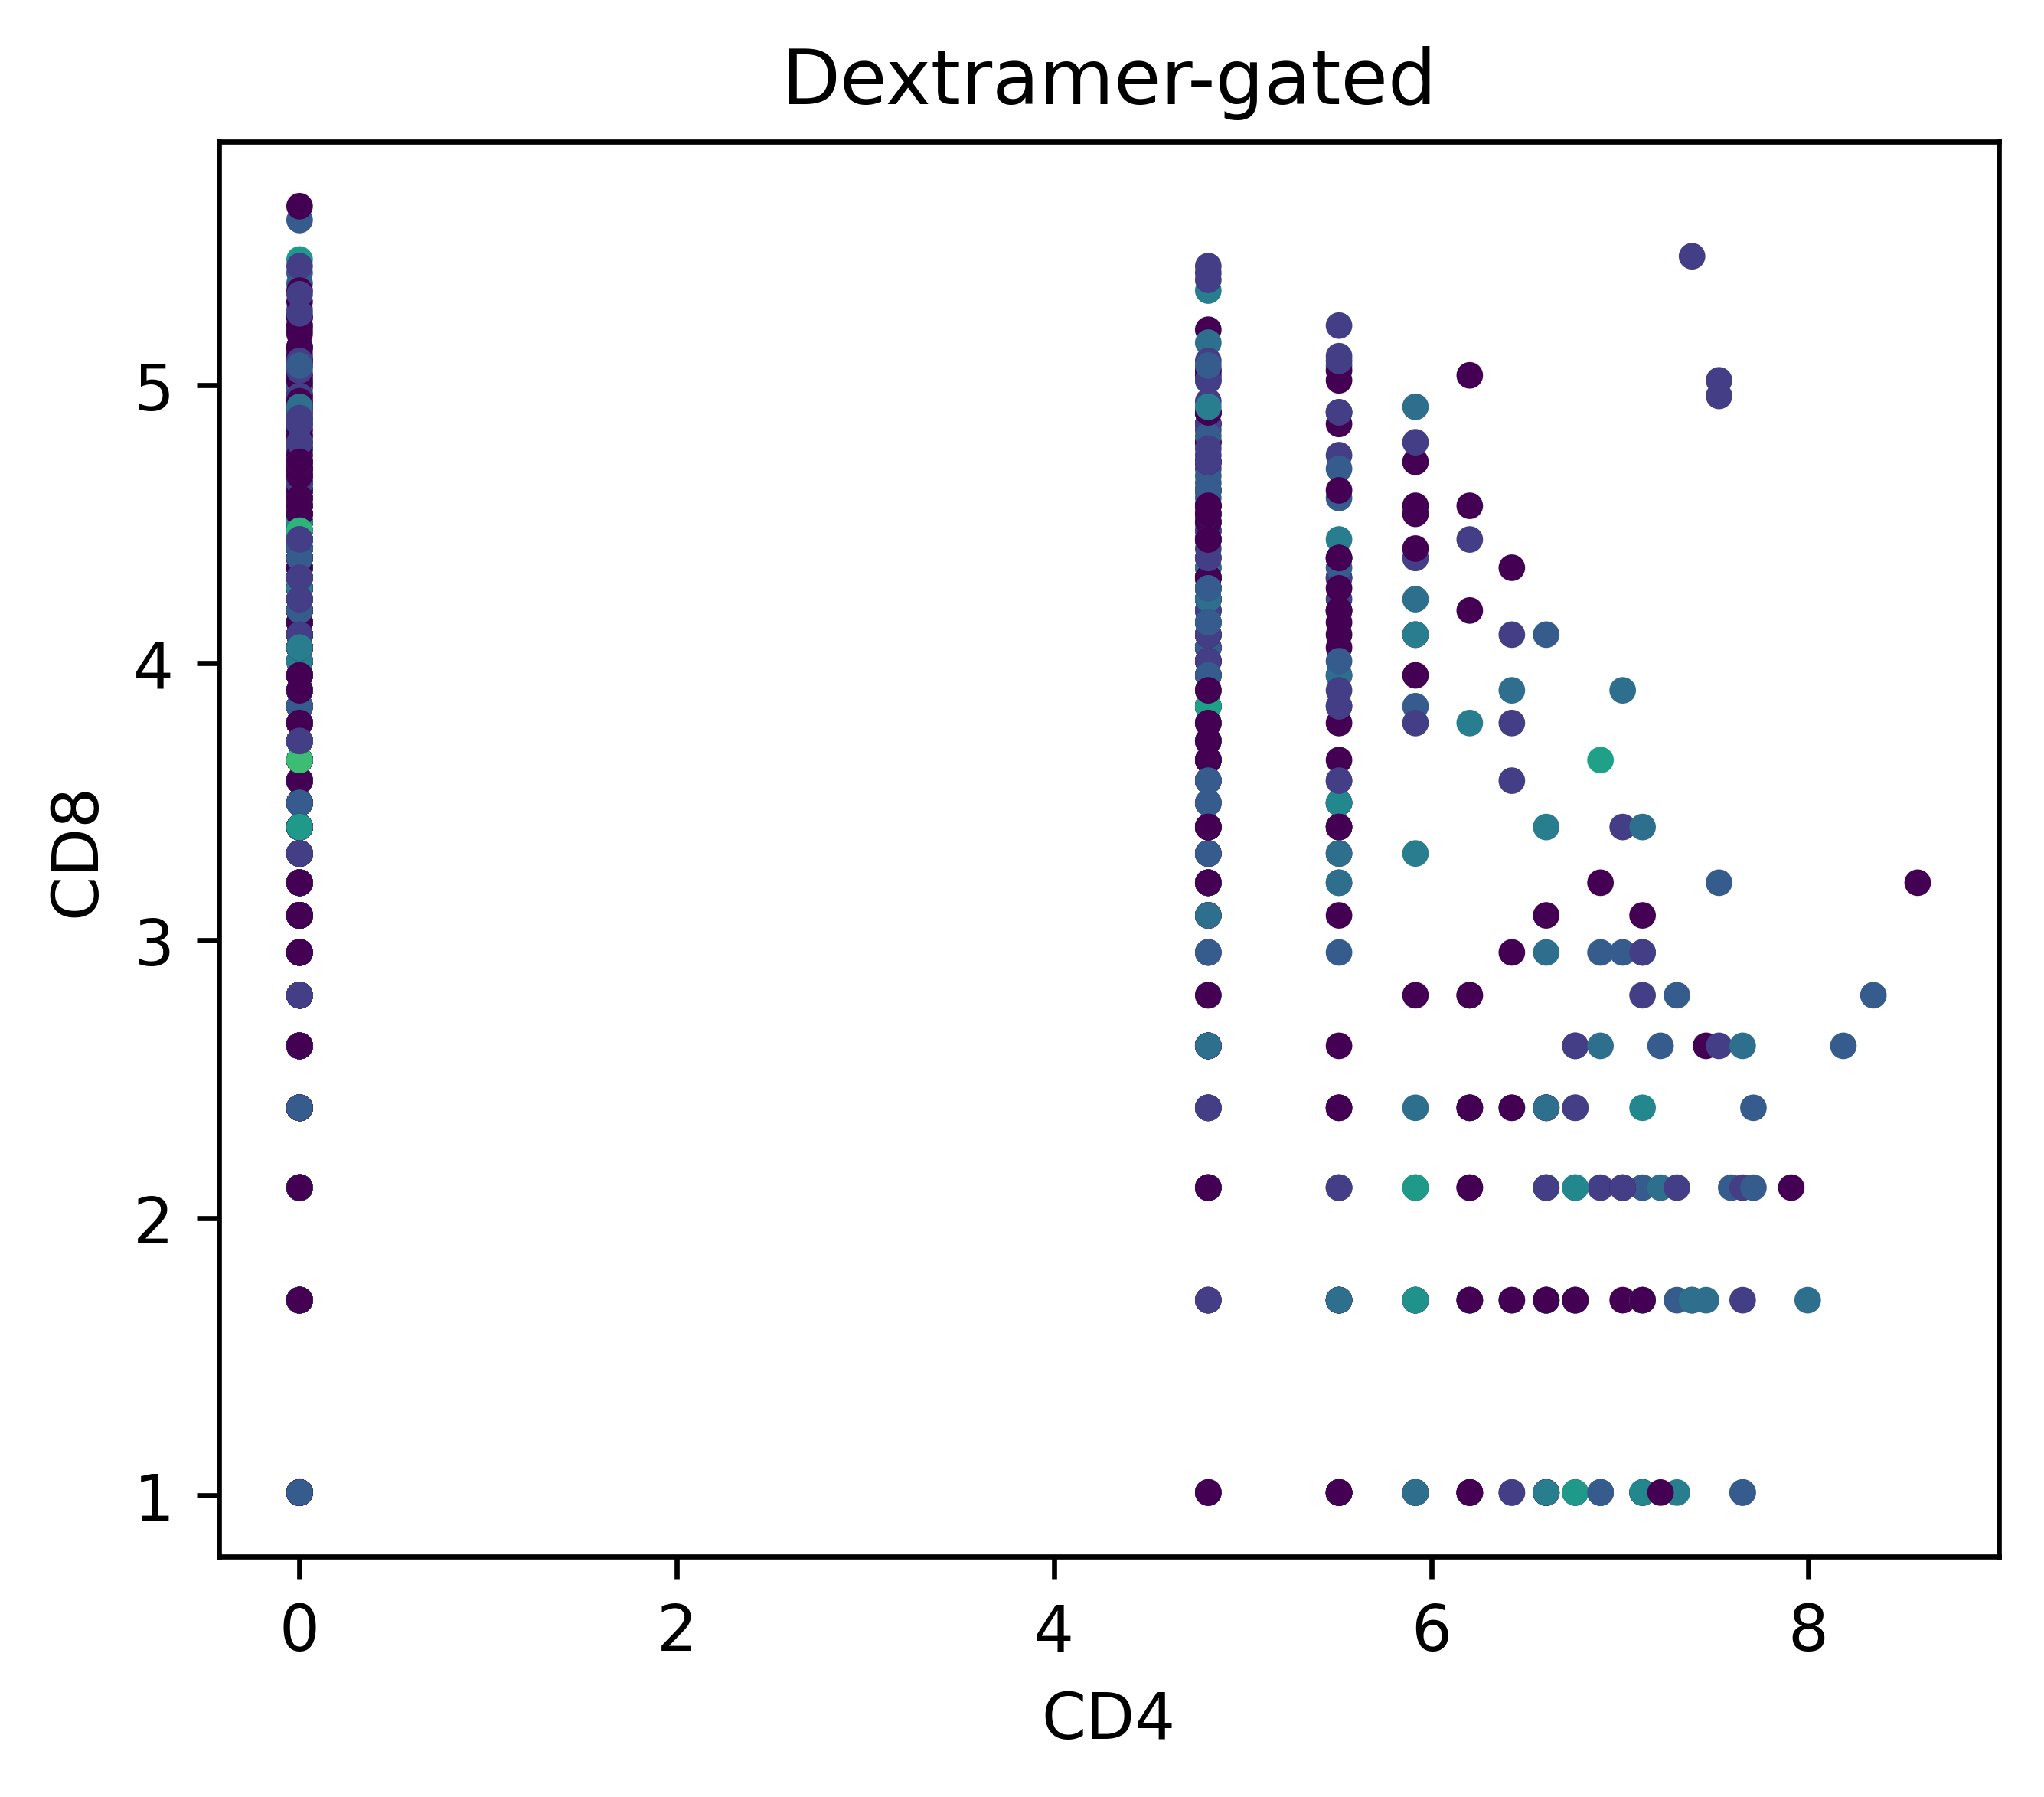

In [152]:
x = gated["CD4"]
y = gated["CD8A"]
z = gated["Dextramer_p53_Y220C|pAbO"]

fig, ax = plt.subplots(figsize=(5,4), dpi=600)
ax.scatter(x, y, c=z, s=10)
plt.title("Dextramer-gated")
plt.xlabel('CD4')
plt.ylabel('CD8')

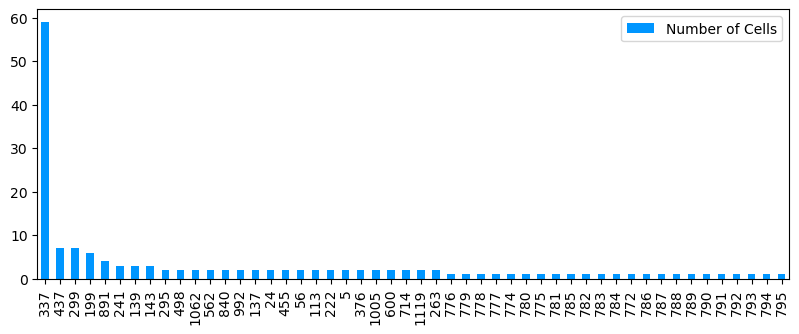

In [153]:
Counts = TCRscape.CountCDR3(gated, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts P53 Detra.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts P53 Detra.csv')
plt.show()

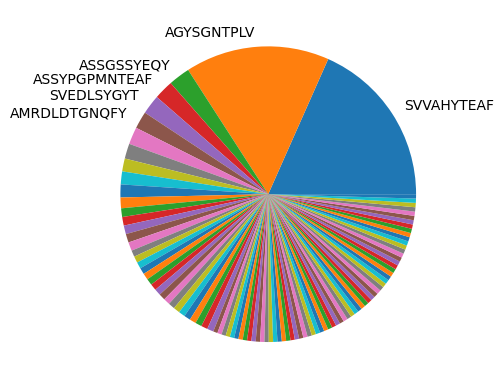

In [154]:
# CDR3 filter - minimum number of cells with the same CDR3 
min_CDR3 = 2

# Optional - Remove non top-X CDR3s
CDR3_top = 6

Pie = TCRscape.CDR3pie(gated, AIRR, min_CDR3, CDR3_top)

In [119]:
e6 = e6.reset_index()
e7 = e7.reset_index()
p53d = p53d.reset_index()

gated_T = TCRscape.MergeRhapsody([e6,e7,p53d])
gated_T

,index,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53d
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,1,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,3,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,4,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,6950,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,6951,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,6952,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
# Minimum clonotypes
min_clones = 1

# Featurs to use for clustering
features_to_cluster = ['CD4', 'CD8A', 'NKG7', # T-cell type
                       'FOXP3', # Treg
                       # 'SELL','SELL','IL7R','CCR7', 'IL2RA', # T-cell type markers
                       'Dextramer_HPV_16_E6|pAbO', 'Dextramer_HPV_16_Е7|pAbO', 'Dextramer_p53_Y220C|pAbO',
                       'Sample_E6','Sample_E7','Sample_p53d'
                      ]

In [121]:
df = TCRscape.TCRscape(gated_T, AIRR, features_to_cluster, min_clones)
df

,CD4,CD8A,NKG7,FOXP3,Dextramer_HPV_16_E6|pAbO,Dextramer_HPV_16_Е7|pAbO,Dextramer_p53_Y220C|pAbO,Sample_E6,Sample_E7,Sample_p53d,...,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_CRCF,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MFIGNSPLLLTVGLGLSKVEQFQLSISTEVKKSIDIPCKISSTRFETDVIHWYRQKPNQALEHLIYIVSTKSAARRSMGKTSNKVEARKNSQTLTSILTIKSVEKEDMAVYYCAAWEGLSYYKKLFGSGTTLVVTDKQLDADVS,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHASTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEPQELGKKIKVFGPGTKLIITDKQLDADVS,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHTSTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEAQELGKKIKVFGPGTKLIITDKQLDADVS,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHTSTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEQKQELGKKIKVFGPGTKLIITDKQLDADVS,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHTSTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEVPELGKKIKVF,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHTSTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEVQELGKKIKVFGPGTKLIITDKQLDADVS,Clonotype_TRD_THLWKRNPCDCGTKKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MQWALAVLLAFLSPASQKSSNLEGRTKSVIRQTGSSAEITCDLAERSTDYIHWYLHQEGKAPQRLLYYDSYTSRVVLESGISPGKYDTYGSTRQNLRMILRNLIENDSGVYYCATWDVLPFSRGSDWIKTFAKGTRLIVTSPDIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS,Clonotype_TRD_TPAKTSYPKQHSPSPGGARKSASYQTIRFCHEKWNKCRLSGEGILPQGY___TRG_MLSLLHTSTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWEAVGELGKKIKVFGPGTKLIITDKQFD,Clonotype_TRD____TRG_MLSLLHASTLAVLGALCVYGAGHLEQPQISSTKTLSKTARLECVVSGITISATSVYWYRERPGEVIQFLVSISYDGTVRKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYCALWGRNPCDYYKKLFGSGTTLVVTDKQLDADVS
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0.000000,4.537632,3.804527,0.000000,3.889626,0.0,0.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56865,0.000000,4.146766,2.939529,0.000000,2.791013,0.0,0.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
61317,0.000000,4.772472,4.155925,4.194121,4.736924,0.0,0.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
88775,0.000000,5.477180,5.757927,4.887268,3.889626,0.0,0.000000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
201392,5.916357,1.011272,3.693301,0.000000,4.177308,0.0,4.966284,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56394339,0.000000,4.566620,4.885439,0.000000,4.582773,0.0,0.000000,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
56456846,0.000000,4.378568,4.597757,0.000000,2.791013,0.0,0.000000,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
56523990,0.000000,3.313857,4.497674,5.580415,2.791013,0.0,5.659431,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


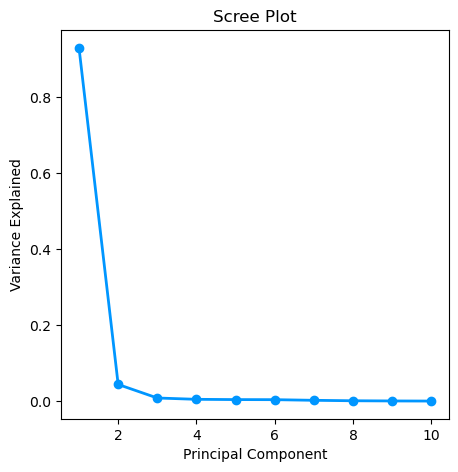

In [122]:
X = df

# Plot background color
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'

# PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X.T)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(5,5.045))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#0096FF')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot.png', dpi=600, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/anaconda3/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling bac

Text(0, 0.5, 'UMAP 2')

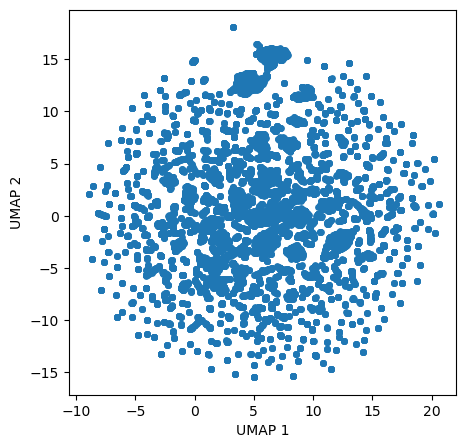

In [123]:
n_components = 2 # From the Scree Plot

# UMAP
clusterable_embedding = umap.UMAP(
                                  n_neighbors=5,
                                  min_dist=0.1,
                                  n_components=n_components,
                                  random_state=14,
                                 ).fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=15, cmap='Spectral')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

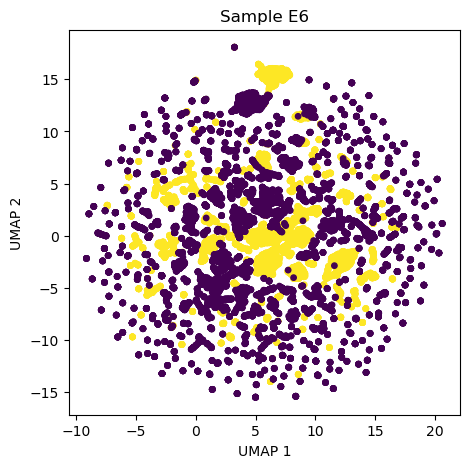

In [124]:
#UMAP Feature plot

feature = df["Sample_E6"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Sample E6")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample E6.png', dpi=600, bbox_inches='tight')

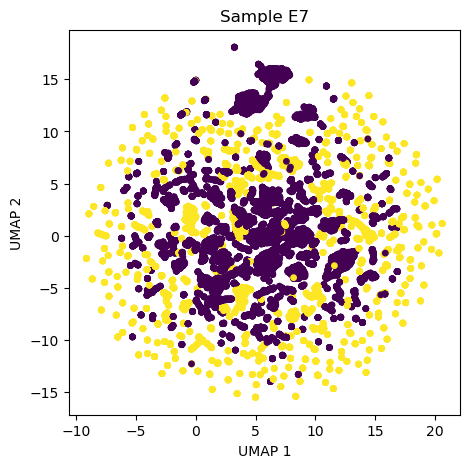

In [125]:
#UMAP Feature plot

feature = df["Sample_E7"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Sample E7")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample E7.png', dpi=600, bbox_inches='tight')

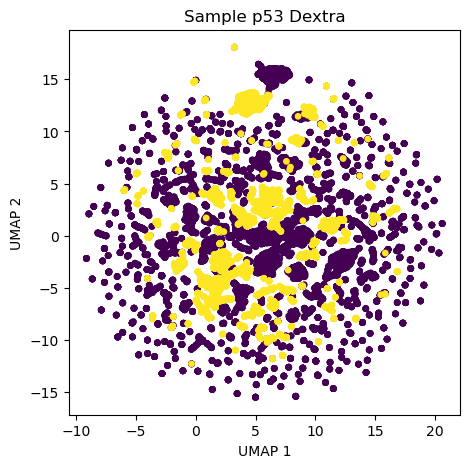

In [126]:
#UMAP Feature plot

feature = df["Sample_p53d"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Sample p53 Dextra")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample p53d.png', dpi=600, bbox_inches='tight')

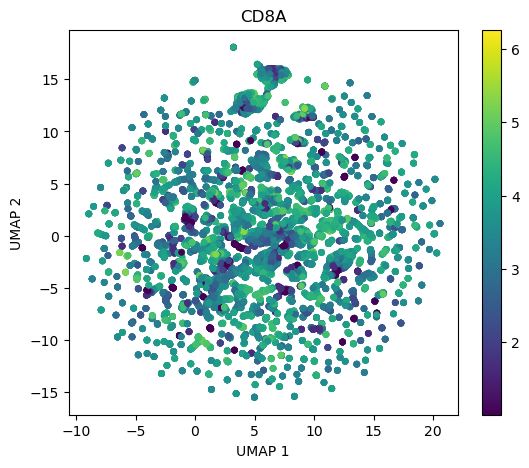

In [127]:
#UMAP Feature plot

feature = df["CD8A"]

plt.figure(figsize=(6.275,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("CD8A")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape CD8A.png', dpi=600, bbox_inches='tight')

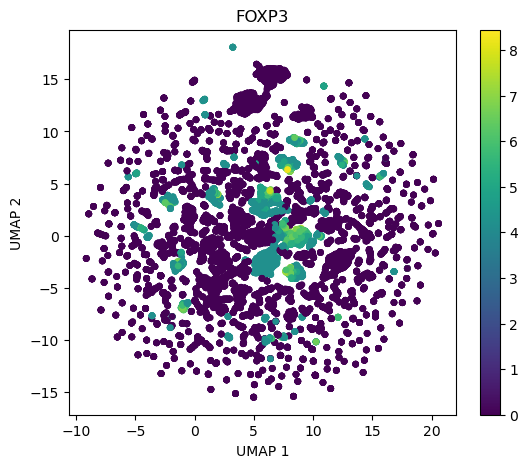

In [128]:
#UMAP Feature plot

feature = df["FOXP3"]

plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("FOXP3")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape FOXP3.png', dpi=600, bbox_inches='tight')

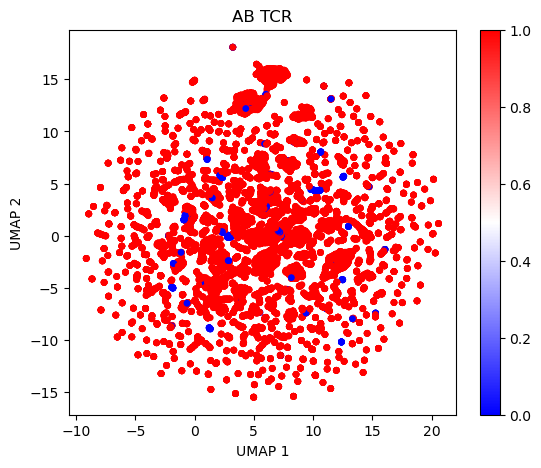

In [129]:
#UMAP Feature plot

feature = df["TCR_Type"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("AB TCR")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TCR Type.png', dpi=600, bbox_inches='tight')

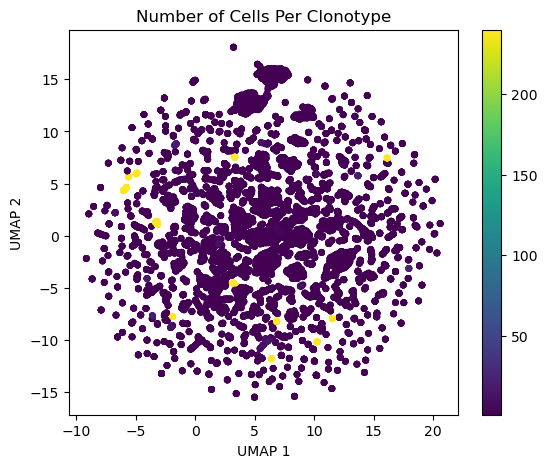

In [130]:
#UMAP Feature plot

feature = df["Number of Cells"]

plt.figure(figsize=(6.278,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Number of Cells Per Clonotype")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Number of Cells Per Clonotype.png', dpi=600, bbox_inches='tight')

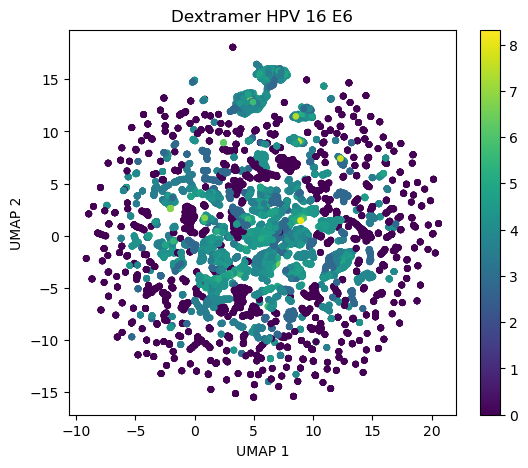

In [131]:
#UMAP Feature plot

feature = df['Dextramer_HPV_16_E6|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Dextramer HPV 16 Е6")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Dextramer_HPV_16_E6.png', dpi=600, bbox_inches='tight')

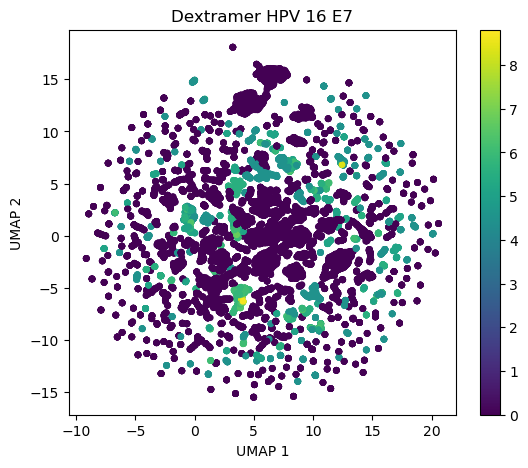

In [132]:
#UMAP Feature plot

feature = df['Dextramer_HPV_16_Е7|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Dextramer HPV 16 Е7")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape HPV_16_Е7.png', dpi=600, bbox_inches='tight')

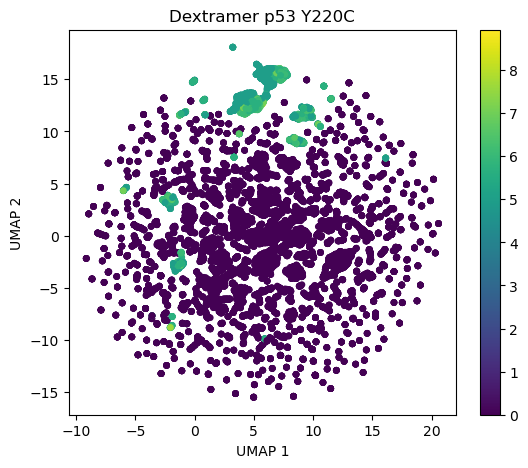

In [133]:
#UMAP Feature plot

feature = df['Dextramer_p53_Y220C|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "viridis", s = 15)

plt.title("Dextramer p53 Y220C")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Dextramer_p53_Y220C.png', dpi=600, bbox_inches='tight')

## Export clonotype data per Sample to Seurat

In [ ]:
sample = p53_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype.to_csv('p53_1 Clonotypes.csv')
sample_clonotype